In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns

Load the iris Dataset

In [2]:

data=pd.read_csv("Iris.csv")

Data exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Identifyin the null value in dataset

isnull() function reflects that there is no nul value present in iris dataset therefore data is cleaned


In [5]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [6]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

Data preprocessing

In [7]:
import plotly.express as px


boxplot_data = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']]

# Create the interactive boxplot using Plotly Express
fig = px.box(boxplot_data, x='SepalLengthCm', y='SepalWidthCm', color='PetalLengthCm', title=' Distribution by SepalLengthCm, SepalWidthCm and PetalLengthCm')


# Display the figure
fig.show()

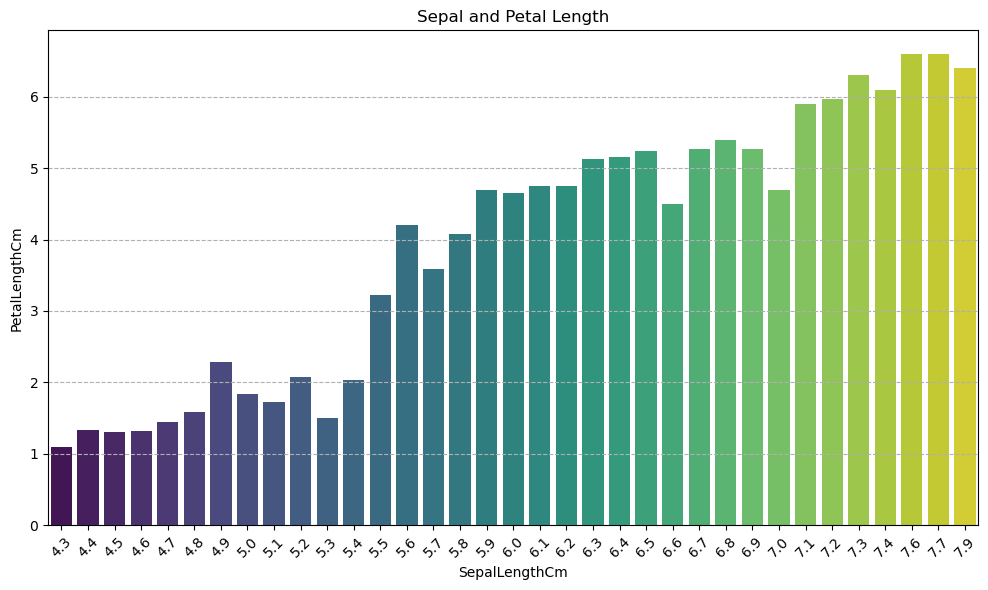

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Group data by age_group and calculate mean following_rate for each group
following_rate_by_age_group = data.groupby('SepalLengthCm')['PetalLengthCm'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='SepalLengthCm', y='PetalLengthCm', data=following_rate_by_age_group, palette='viridis')

# Customize plot elements
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Sepal and Petal Length')
plt.xticks(rotation=45)



# Show gridlines
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

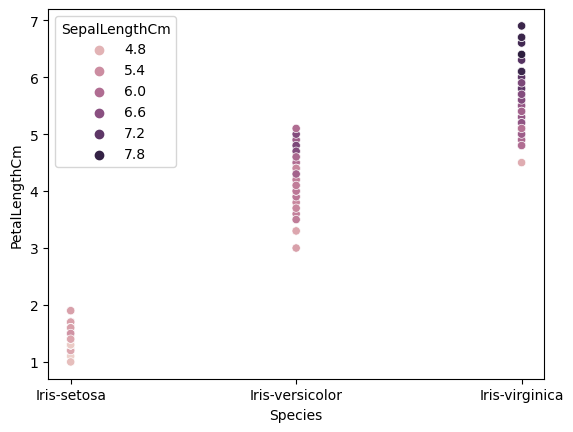

In [9]:

sns.scatterplot(x=data['Species'], y=data['PetalLengthCm'], hue=data['SepalLengthCm'])

In [11]:
ndata = data.groupby('Species').size().rename_axis('Speciescount').reset_index(name='Count')
ndata.head()

,Speciescount,Count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


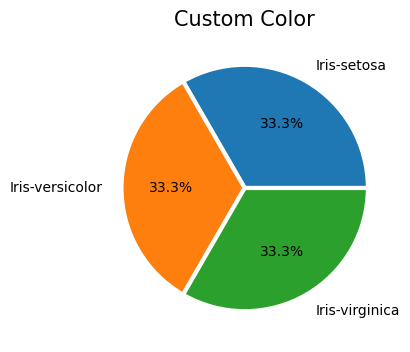

In [12]:
labels = ndata.Speciescount
values = ndata.Count

plt.figure(figsize=(5,4))
plt.pie(values, labels=labels, 
        labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, 
        autopct='%1.1f%%');
plt.title("Custom Color", size=15)
plt.show();

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X = data.drop(columns='Species', axis =1)
Y = data['Species']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
LRmodel = LogisticRegression()
LRmodel.fit(X_train, Y_train)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [15]:
#accuracy calculation on training data
X_train_prediction = LRmodel.predict(X_train)
training_dataaccuracy = accuracy_score(Y_train, X_train_prediction)

In [16]:
print('Accuracy of logistic regression model on training data : ', round(training_dataaccuracy*100, 2), '%')

Accuracy of logistic regression model on training data :  100.0 %


In [17]:
X_test_prediction = LRmodel.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy of logistic regression model on test data: ', round(test_data_accuracy*100, 2), '%')

Accuracy of logistic regression model on test data:  100.0 %


In [18]:
from sklearn.metrics import confusion_matrix


In [19]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained a model and obtained predictions on the test set
X_train_prediction = LRmodel.predict(X_test)

# Ensure that Y_test and X_train_prediction have the same number of samples
confusionmatrix = confusion_matrix(Y_test, X_train_prediction)

print(confusionmatrix)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


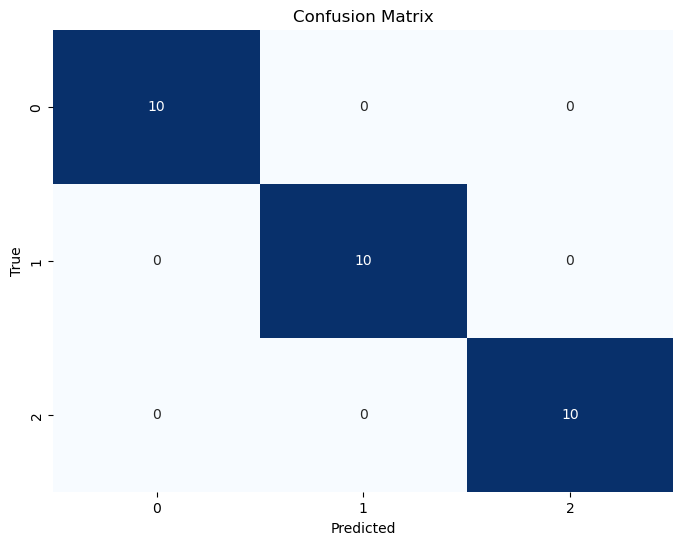

In [20]:
X_train_prediction = LRmodel.predict(X_test)

# Calculate the confusion matrix
confusionmatrix = confusion_matrix(Y_test, X_train_prediction)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()